# Predicting Traffic Condition using Logistic Regression

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

## Read the Dataset

In [2]:
dataset = pd.read_csv('datasets/Traffic.csv')
dataset.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


## Describe the Dataset

In [3]:
dataset.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [4]:
dataset.shape

(2976, 9)

## Null Values

In [5]:
dataset.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [6]:
# Deleting null values
dataset = dataset.dropna()

## Dataset Columns

In [7]:
dataset.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


## Visualizing the Data

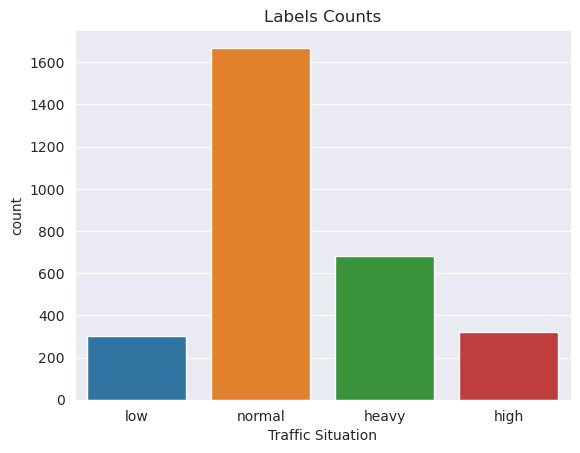

In [9]:
sns.countplot(x='Traffic Situation', data=dataset)
plt.title("Labels Counts")
plt.show()

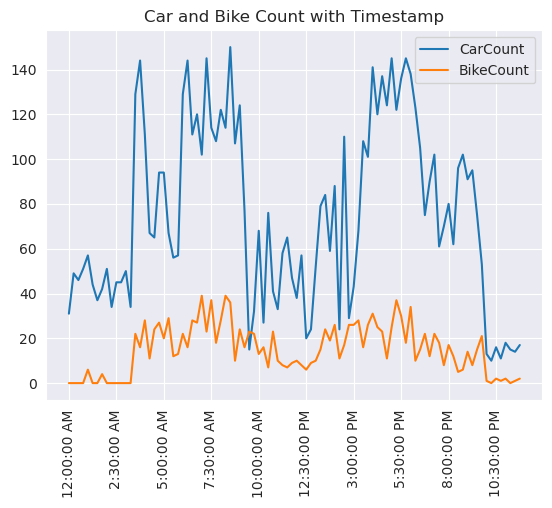

In [10]:
dataset_rd = dataset.head(96)
plt.plot(dataset_rd['Time'], dataset_rd['CarCount'])
plt.plot(dataset_rd['Time'], dataset_rd['BikeCount'])
plt.legend(dataset_rd.columns[3:5])
plt.title("Car and Bike Count with Timestamp")
plt.xticks(rotation=90, ticks=dataset_rd['Time'][::10])
plt.show()

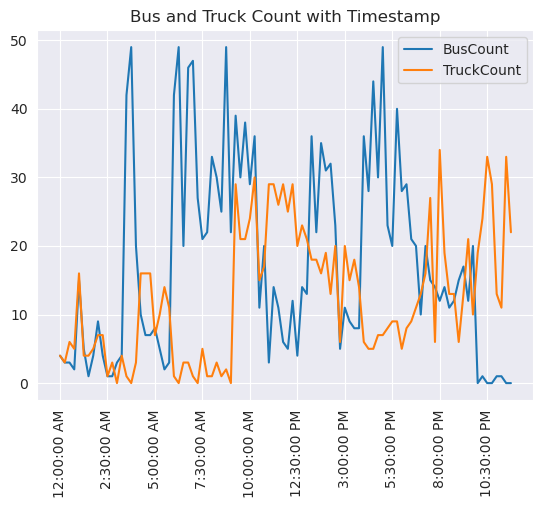

In [11]:
plt.plot(dataset_rd['Time'], dataset_rd['BusCount'])
plt.plot(dataset_rd['Time'], dataset_rd['TruckCount'])
plt.legend(dataset_rd.columns[5:7])
plt.title("Bus and Truck Count with Timestamp")
plt.xticks(rotation=90, ticks=dataset_rd['Time'][::10])
plt.show()

## Normalization Data

In [12]:
# Separate time column into time and midday

for i in range(len(dataset['Time'])):    
    dataset.loc[i, 'midday'] = str(dataset.loc[i, 'Time'][-2:])

dataset['Time'] = dataset['Time'].str[:-2]

In [13]:
dataset.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
2971,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
2972,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
2973,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
2974,11:30:00,9,Thursday,16,5,0,27,48,normal,PM
2975,11:45:00,9,Thursday,14,3,1,15,33,normal,PM


In [14]:
# Change Time column from (Hour:Minute:second) format to seconds

dataset['Time'] = pd.to_datetime(dataset['Time']).dt.hour * 3600 + \
                    pd.to_datetime(dataset['Time']).dt.minute * 60 + \
                    pd.to_datetime(dataset['Time']).dt.second

In [15]:
dataset.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
2971,38700,9,Thursday,16,3,1,36,56,normal,PM
2972,39600,9,Thursday,11,0,1,30,42,normal,PM
2973,40500,9,Thursday,15,4,1,25,45,normal,PM
2974,41400,9,Thursday,16,5,0,27,48,normal,PM
2975,42300,9,Thursday,14,3,1,15,33,normal,PM


In [16]:
# Separate features and label
features = dataset.drop(['Traffic Situation'], axis=1)
label = dataset['Traffic Situation']

# Normalize numeric features with MinMaxScaler
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = MinMaxScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

# Encode 'midday' and 'Day of the Week' columns using LabelEncoder
le = LabelEncoder()
features['midday'] = le.fit_transform(features['midday'])
features['Day of the week'] = le.fit_transform(features['Day of the week'])

# Encode label using LabelEncoder
le_label = LabelEncoder()
label = le_label.fit_transform(label)

# Combine features and label data
normalized_encoded_data = pd.concat([features, pd.Series(label, name='Traffic Situation')], axis=1)

In [17]:
dataset = normalized_encoded_data
dataset

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.300000,5,0.143678,0.000000,0.08,0.100,0.069767,0,2
1,0.957447,0.300000,5,0.247126,0.000000,0.06,0.075,0.131783,0,2
2,0.978723,0.300000,5,0.229885,0.000000,0.06,0.150,0.131783,0,2
3,1.000000,0.300000,5,0.258621,0.000000,0.04,0.125,0.143411,0,2
4,0.000000,0.300000,5,0.293103,0.085714,0.30,0.400,0.282946,0,3
...,...,...,...,...,...,...,...,...,...,...
2971,0.829787,0.266667,4,0.057471,0.042857,0.02,0.900,0.135659,1,3
2972,0.851064,0.266667,4,0.028736,0.000000,0.02,0.750,0.081395,1,3
2973,0.872340,0.266667,4,0.051724,0.057143,0.02,0.625,0.093023,1,3
2974,0.893617,0.266667,4,0.057471,0.071429,0.00,0.675,0.104651,1,3


## Split Dataset and Training Model

In [18]:
# Split dataset into training and testing dataset

X = dataset.drop('Traffic Situation', axis=1)
y = dataset['Traffic Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2380, 9), (596, 9), (2380,), (596,))

In [19]:
# Training the Model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Prediction

In [20]:
y_pred = model.predict(X_test)

## Evaluation

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision with 'weighted' average setting
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall with 'weighted' average setting
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score with 'weighted' average setting
f1 = f1_score(y_test, y_pred, average='weighted')

In [22]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8708053691275168
Precision: 0.8654642018279359
Recall: 0.8708053691275168
F1 Score: 0.862735925699821


## Confusion Matrix

In [23]:
cm = multilabel_confusion_matrix(y_test, y_pred)
cm

# TODO: Plotting confusion matrix

array([[[455,  14],
        [  6, 121]],

       [[529,  10],
        [ 26,  31]],

       [[529,   7],
        [ 27,  33]],

       [[198,  46],
        [ 18, 334]]])